In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price/train.csv
/kaggle/input/mobile-price/test.csv


![](http://lowko.tv/wp-content/uploads/green-bar-2.jpg)

* * * * * * * * *  ![](https://th.bing.com/th/id/OIP.O8l9JhctZRspr2vdwvYx5gHaEK?pid=ImgDet&rs=1)                     

### Information about Dataset

✔️ battery_power = Total energy a battery can store in one time measured in mAh.

✔️ blue = Has bluetooth or not. | 1: Has, 0: doesn't have

✔️ clock_speed = Speed at which microprocessor executes instructions.

✔️ dual_sim = Has dual sim support or not | 1: support, 0: doesn't support

✔️ fc = Front Camera mega pixels.

✔️ four_g = Has 4G or not. | 1: Has, 0: doesn't have

✔️ int_memory = Internal memory in gigabytes.

✔️ m_dep = Mobile Depth in cm.

✔️ mobile_wt = Weight of mobile phone.

✔️ n_cores = Number of cores of processor.

✔️ pc = Primary Camera mega pixels.

✔️ px_height = Pixel Resolution Height.

✔️ px_width = Pixel Resolution Width.

✔️ ram = Random Access Memory in Mega Bytes.

✔️ sc_h = Screen Height of mobile in cm.

✔️ sc_w = Screen Width of mobile in cm.

✔️ talk_time = Longest time that a single battery charge will last when you are.

✔️ three_g = Has 3G or not. | 1: Has, 0: Doesn't have

✔️ touch_screen = Has touch screen or not. | 1: Has, 0: Doesn't have

✔️ wifi = Has wifi or not. | 1: Has, 0: Doesn't have

✔️ price_range = This is the target variable.| 3: Very High Cost, 2: High Cost, 1: Medium Cost, 0: Low Cost

In [2]:
#Importing all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix , classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
import warnings

In [3]:
warnings.simplefilter(action ='ignore')
plt.style.use('seaborn')

In [4]:
#Reading test data
test_df = pd.read_csv("../input/mobile-price/test.csv")
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
#Reading training data
train_df = pd.read_csv("../input/mobile-price/train.csv")
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train_df.shape

(2000, 21)

In [8]:
#Cheking features_data types and their count of null
data_types = pd.DataFrame(train_df.dtypes, columns=['Data Types'])
count_of_nulls = pd.DataFrame(train_df.isnull().sum(), columns=['Count of Nulls'])

Check_data = pd.concat([data_types, count_of_nulls], axis='columns')
Check_data

,Data Types,Count of Nulls
battery_power,int64,0
blue,int64,0
clock_speed,float64,0
dual_sim,int64,0
fc,int64,0
four_g,int64,0
int_memory,int64,0
m_dep,float64,0
mobile_wt,int64,0
n_cores,int64,0


<AxesSubplot:>

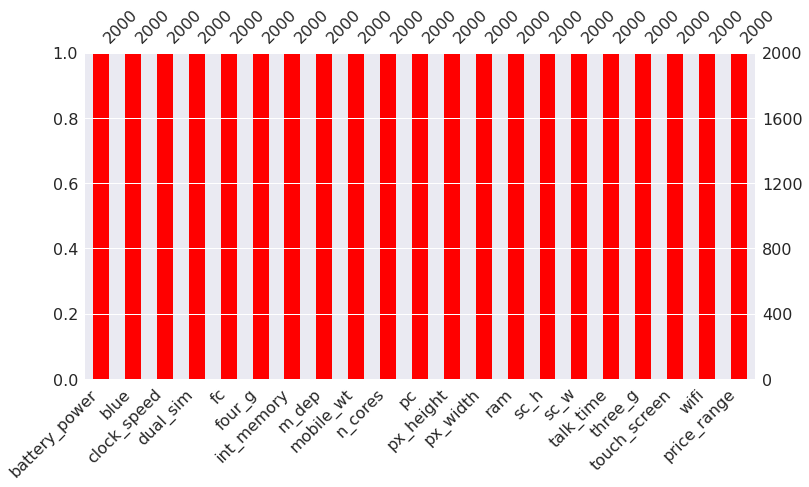

In [9]:
#Describing data in other way
msno.bar(train_df, color='Red' , figsize=(12,6))

In [10]:
train_df.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [11]:
#checking count of categorical features
columns =['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for col in columns:
    print(col)
    print(train_df[col].value_counts())
    print('-'*25)

blue
0    1010
1     990
Name: blue, dtype: int64
-------------------------
dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64
-------------------------
four_g
1    1043
0     957
Name: four_g, dtype: int64
-------------------------
three_g
1    1523
0     477
Name: three_g, dtype: int64
-------------------------
touch_screen
1    1006
0     994
Name: touch_screen, dtype: int64
-------------------------
wifi
1    1014
0     986
Name: wifi, dtype: int64
-------------------------


In [12]:
#Cheking noise value
Px_h= train_df.loc[train_df['px_height']==0]
Px_h

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [13]:
#Removing noise values
train_df.drop(index=[1481,1933], inplace=True)
train_df.reset_index(inplace = True)
train_df.drop('index',axis=1,inplace=True)
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1994,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1995,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1996,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


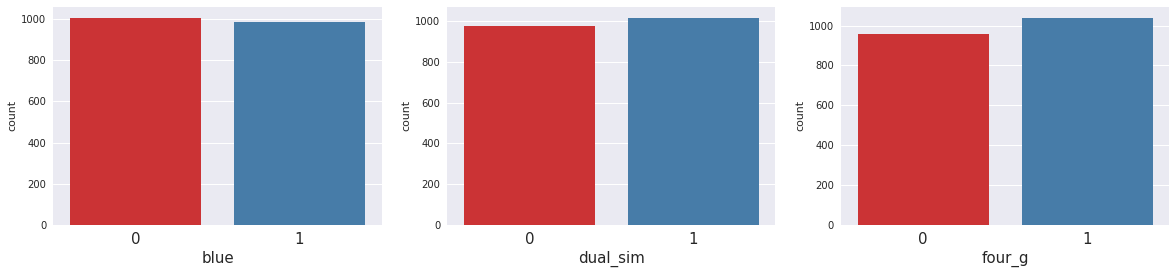

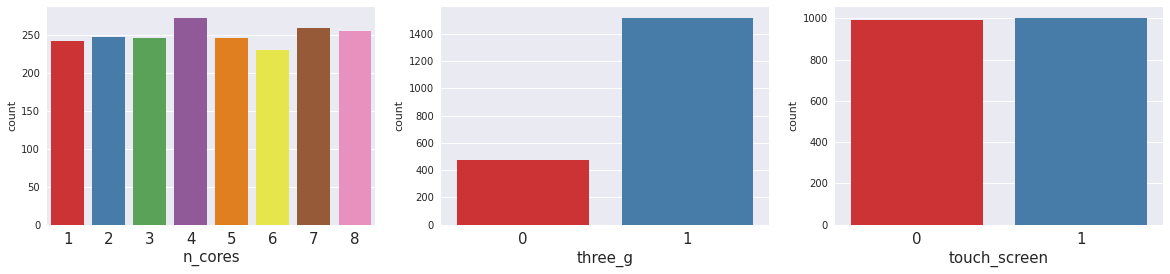

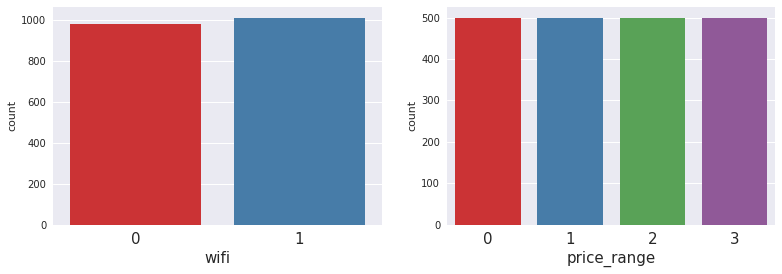

In [14]:
#Plotting Categorical features
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']
i = 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)                         
    sns.countplot(x = Categorical[i], data=train_df, palette='Set1') 
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i], data=train_df, palette= 'Set1') 
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    
    if i==8:
        break
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i], data=train_df, palette='Set1')
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    plt.show()

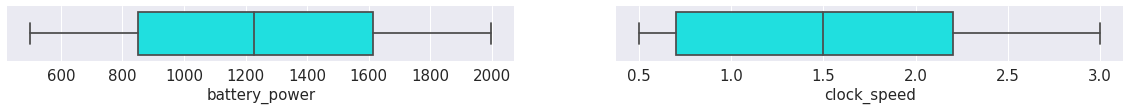

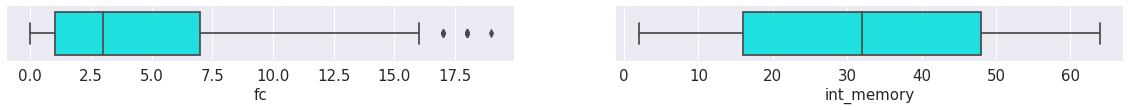

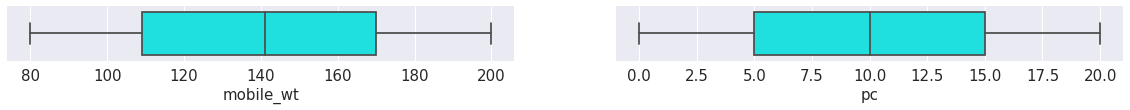

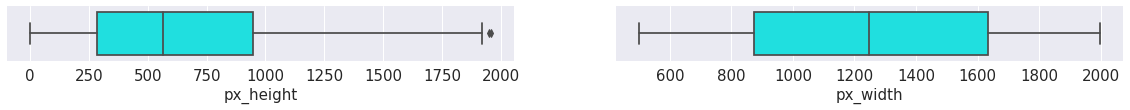

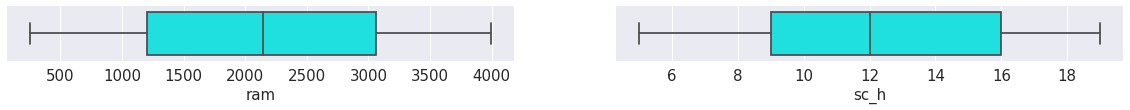

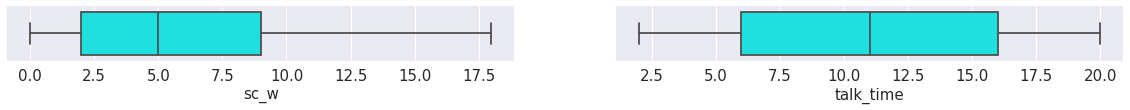

In [15]:
#Plotting continuous features
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
         
i = 0
while i<12:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   
    sns.boxplot(x = Numerical[i], data=train_df, color='cyan') 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=train_df, color='cyan') 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

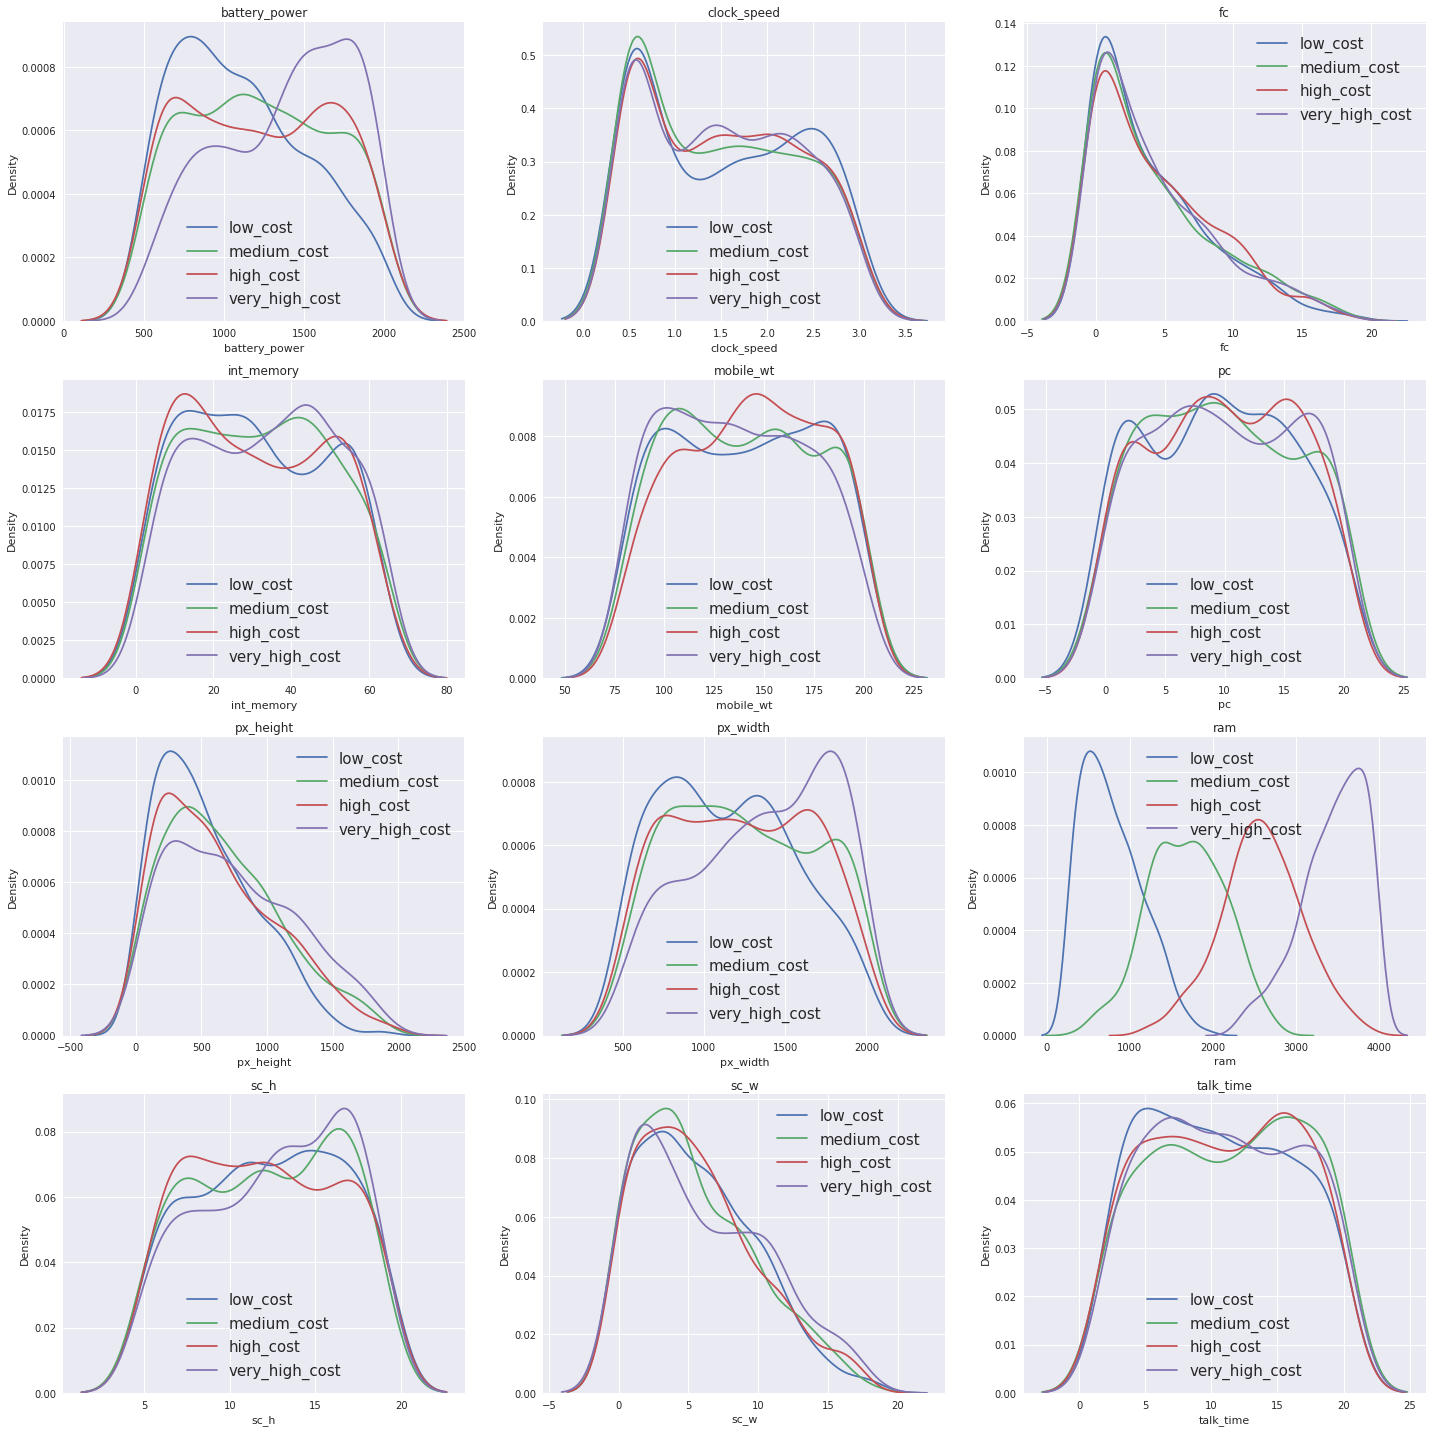

In [16]:
#Plotting continuous features using kde 
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

low_cost = train_df[train_df['price_range']==0]
medium_cost = train_df[train_df['price_range']==1]
high_cost = train_df[train_df['price_range']==2]
very_high_cost = train_df[train_df['price_range']==3]
        

plt.figure(figsize = (20,20))
for ax, col in enumerate(Numerical):
    plt.subplot(4,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = low_cost[col], label = "low_cost")
    sns.kdeplot(x = medium_cost[col], label = "medium_cost")
    sns.kdeplot(x = high_cost[col], label = "high_cost")
    sns.kdeplot(x = very_high_cost[col], label = "very_high_cost")
    plt.legend(fontsize =15)
plt.tight_layout()

In [17]:
#Chenging value of price range
train_df1 = train_df.copy()
train_df1.loc[(train_df1['price_range'] ==0), 'price_range'] = 'Low Cost'
train_df1.loc[(train_df1['price_range'] ==1), 'price_range'] = 'Medium Cost'
train_df1.loc[(train_df1['price_range'] ==2), 'price_range'] = 'High Cost'
train_df1.loc[(train_df1['price_range'] ==3), 'price_range'] = 'Very High Cost'

train_df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Medium Cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,High Cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,High Cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,High Cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Medium Cost


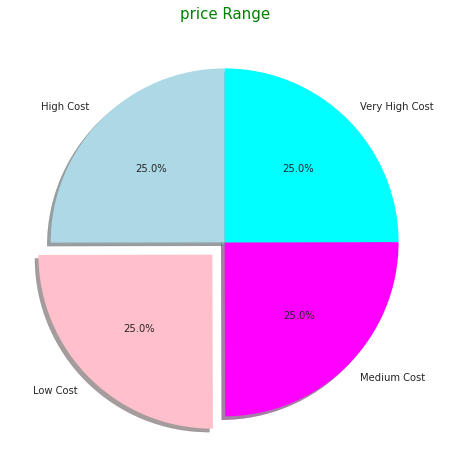

In [18]:
# Pie plot for price range
labels = train_df1["price_range"].value_counts().index
sizes = train_df1["price_range"].value_counts()
colors = ['lightblue','pink','magenta','cyan',"orange","yellow"]
plt.figure(figsize = (8,8))
explode = (0,0.1,0,0)
plt.pie(sizes, labels=labels,explode=explode,rotatelabels=False, autopct='%2.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('price Range',color = 'green',fontsize = 15)
plt.show()

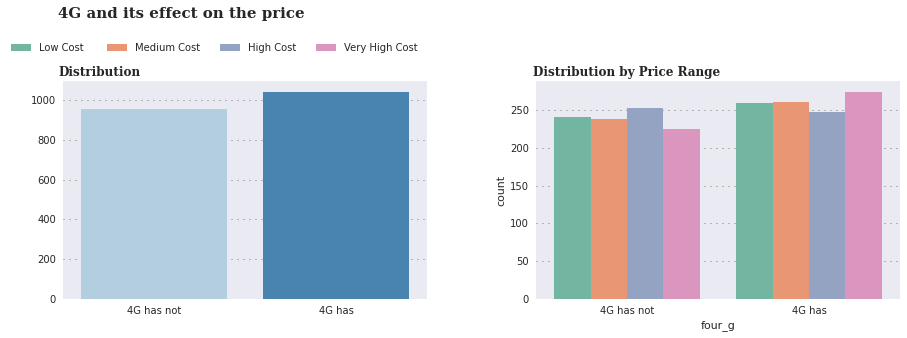

In [19]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'4G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='four_g',
           data=train_df,
            palette='Blues',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.set_xticklabels(["4G has not","4G has"])
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xlabel("")
ax0.set_ylabel("")  

sns.countplot(x='four_g',
             data=train_df,
             hue='price_range',
              palette='Set2',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["4G has not","4G has"])
fig.show()

In [20]:
px.box(train_df,x='price_range',y='ram',
       color='price_range',template='ggplot2',
       labels={'price_range':'price Range',
               'ram':'ram'},
       title="<b>Effect of Ram Capacity on Price Range")

In [21]:
px.bar(train_df,x='price_range',y='n_cores',
       color='price_range', template='plotly',
       labels={'price_range':'price Range',
               'n_cores':'n_cores'},
       title="<b>Effect of number of cores on Price Range")

In [22]:
px.bar(train_df,x='price_range',y='battery_power',
       color='price_range',template='ygridoff',
       labels={'price_range':'price_range',
               'battery_power':'battery_power'},
       title='<b>Battery power by price Range')

Text(0.5, 1.0, 'Ram vs Battery_power')

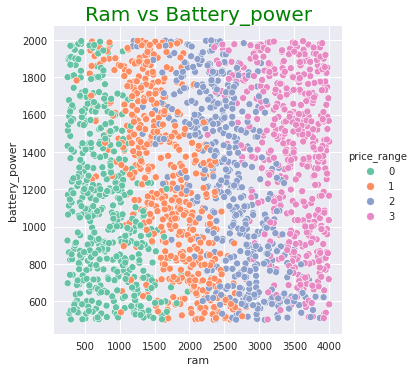

In [23]:
#By increasing the RAM capacity, the price range is higher
sns.relplot(x='ram' , y='battery_power', hue='price_range',data=train_df,palette='Set2')
plt.title('Ram vs Battery_power',fontsize=20,c='green')

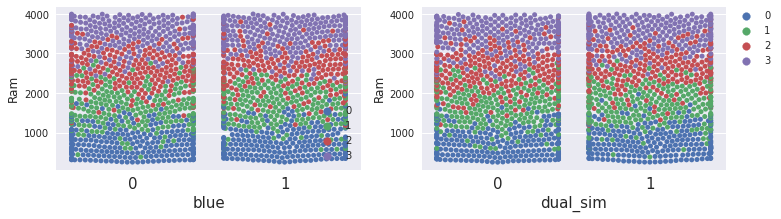

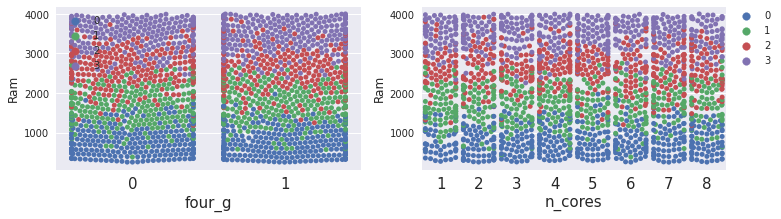

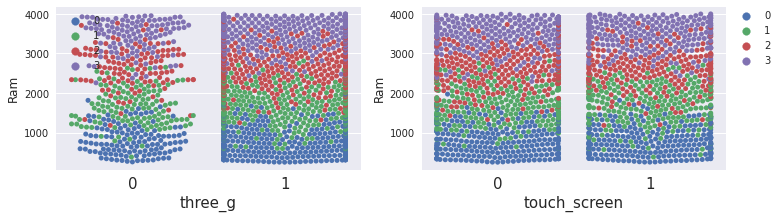

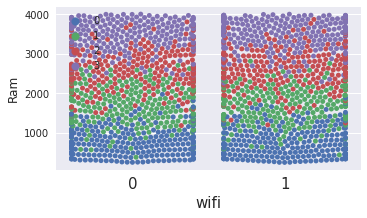

In [24]:
#Comparing ram with other categorical features
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<7:
    fig = plt.figure(figsize = [12,3])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.swarmplot(x =train_df[Categorical[i]].values , y=train_df.ram.values, hue=train_df.price_range.values) 
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.ylabel('Ram',fontsize=12)
    plt.grid()
    plt.grid()
    i += 1
    if i==7:
        break
    plt.subplot(1,2,2)
    sns.swarmplot(x =train_df[Categorical[i]].values , y=train_df.ram.values, hue=train_df.price_range.values) 
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.ylabel('Ram',fontsize=12)
    plt.grid()
    plt.grid()
    i += 1
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

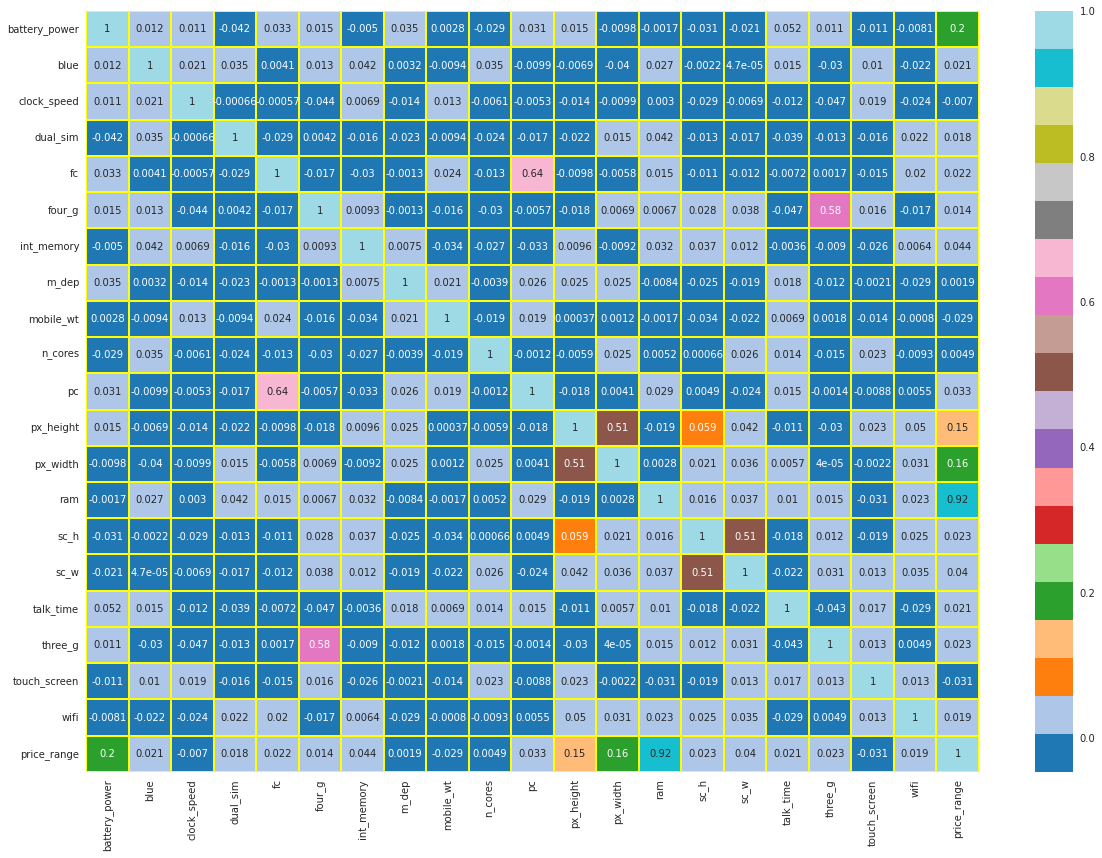

In [25]:
# All features Correlation with price range
plt.figure(figsize = (20,14))
linewidths = 2
linecolor = "yellow"
sns.heatmap(train_df.corr(), xticklabels = train_df.columns,yticklabels = train_df.columns
           , annot = True , cmap="tab20",linewidths=linewidths, linecolor=linecolor)
plt.show()

In [26]:
# Making Model
x = train_df. drop('price_range', axis =1)
y = train_df.price_range.values.reshape(-1,1) # Target variable
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0)

# Decision Tree Algorithm

In [27]:
clf = DecisionTreeClassifier()


In [28]:
# using gridsearch to find the best parameters for decision tree
max_depth = range(6,21)
criterion = ['entropy', 'gini']
random_state =range(1,8)

parameters = {'max_depth': max_depth , 'criterion':criterion , 'random_state':random_state}
gridsearch = GridSearchCV(estimator = clf,
                         param_grid = parameters,
                         scoring = 'accuracy',
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)
gridsearch.fit(x_train,y_train)
print('best score or decision tree:',gridsearch.best_score_)
print('best parameters:',gridsearch.best_params_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
best score or decision tree: 0.8454447492163009
best parameters: {'criterion': 'entropy', 'max_depth': 8, 'random_state': 2}


In [29]:
#Making new DTs model 
clf = DecisionTreeClassifier(max_depth=8,criterion="entropy",random_state =2)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy: 0.865
f1 score for each class is: [0.9223301  0.83428571 0.82727273 0.87437186]
f1 score is: 0.8645650994855756


In [30]:
print('classification_report:\n\n',classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       104
           1       0.84      0.83      0.83        88
           2       0.81      0.84      0.83       108
           3       0.88      0.87      0.87       100

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.87       400



In [31]:
confusion_matrix(y_test, y_pred)


array([[95,  9,  0,  0],
       [ 7, 73,  8,  0],
       [ 0,  5, 91, 12],
       [ 0,  0, 13, 87]])

# Random Forest Algorithm

In [32]:
Rf = RandomForestClassifier(n_estimators =170 , max_depth = 20,criterion = 'gini',random_state =5)
Rf = Rf.fit(x_train,y_train)
y_pred = Rf.predict(x_test)
print("Accuracy :" , metrics.accuracy_score(y_pred,y_test))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy : 0.885
f1 score for each class is: [0.96116505 0.82795699 0.81904762 0.92929293]
f1 score is: 0.8843656465328873


In [33]:
print('classification_report:\n\n',classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       104
           1       0.79      0.88      0.83        88
           2       0.84      0.80      0.82       108
           3       0.94      0.92      0.93       100

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



# SVM Algorithm

In [34]:
svm = SVC(random_state =0)
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy :" , metrics.accuracy_score(y_pred,y_test))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy : 0.9525
f1 score for each class is: [0.98564593 0.95505618 0.92380952 0.94581281]
f1 score is: 0.9525811111202329


In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# instantiate classifier with default hyperparameters
svc=SVC(kernel='linear') 

# fit classifier to training set
svc.fit(X_train,y_train.ravel())

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9725


In [36]:
# defining parameter range
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   2.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   1.7s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.981 total time=   2.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.972 total time=   1.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.259 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.959 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [37]:
#best parameters after tuning
print(grid.best_params_)
  
#info of the params that resulted in the highest score.
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


### Making new SVM model with best parameter

In [38]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # 80% training and 30% test

# instantiate classifier with default hyperparameters
svc=SVC(C=0.1 , decision_function_shape = 'ovo' ,gamma = 1 ,kernel= 'linear') 

# fit classifier to training set
svc.fit(X_train,y_train.ravel())

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9750


In [39]:
svm = SVC(C=0.75 , decision_function_shape = 'ovo' ,gamma = 'auto' ,kernel= 'linear',random_state = 2)
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy :" , metrics.accuracy_score(y_pred,y_test))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy : 0.9725
f1 score for each class is: [0.97607656 0.95454545 0.97169811 0.98522167]
f1 score is: 0.9718854494134431


### َAs we can see, SVM have the best score compared to other algorithms (DTs and Random Forest).

In [40]:
#Creating the Confusion matrix   
cm_SVM = confusion_matrix(y_test, y_pred)
cm_SVM

array([[102,   2,   0,   0],
       [  3,  84,   1,   0],
       [  0,   2, 103,   3],
       [  0,   0,   0, 100]])

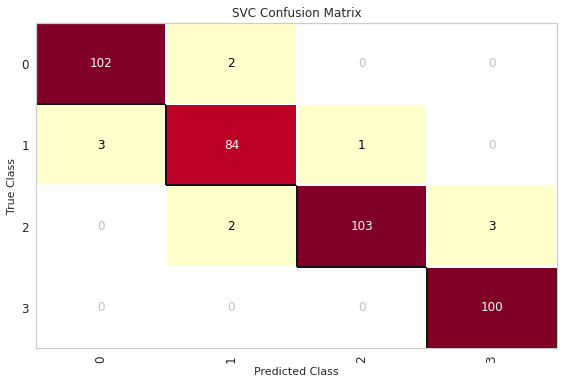

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm , classes=[0,1,2,3])
cm.fit(x_train,y_train)
cm.score(x_test, y_test)
cm.poof()

In [42]:
#Review of test data
test_df.drop(['id'], axis =1 , inplace=True)
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [43]:
test_df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [44]:
#Removing noise of test_df
test_df = test_df[test_df['px_height']>0]
test_df = test_df[test_df['sc_w']>=2]
test_df.reset_index( inplace = True)
test_df.drop('index',axis=1,inplace = True)
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,567,1,2.7,1,14,1,56,0.4,165,8,17,555,1290,336,7,6,7,1,1,1
783,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1
784,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
785,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [45]:
#Predict with test data
prediction=svm.predict(test_df)
prediction

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 2, 2, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

In [46]:
# Making price range column for test data and add to it , then append to train data
from numpy.random import randint
y_rand = randint(0,4,787)
test_df['price_range'] = y_rand
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,2
3,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,3
783,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,3
784,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,3
785,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,0


In [47]:
df_final = train_df.append(test_df)
df_final.reset_index(inplace=True)
df_final

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,782,567,1,2.7,1,14,1,56,0.4,165,...,555,1290,336,7,6,7,1,1,1,3
2781,783,936,1,1.4,1,0,0,46,0.8,139,...,265,886,684,8,5,12,1,1,1,3
2782,784,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,3
2783,785,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,0


In [48]:
train_df.shape


(1998, 21)

In [49]:
x_new_train = df_final.drop(['price_range'],axis=1)[0:1998]
y_new_train = df_final[['price_range']][0:1998]
x_predict = df_final.drop(['price_range'],axis=1)[1998:]
svm.fit(x_new_train,y_new_train)
prediction_all = svm.predict(x_predict)
prediction_all

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 3, 1, 3, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

## Final result--> SVM prediction is the same for both 80% and 100% of the training data